In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = "svg"
import pprint 
pp = pprint.PrettyPrinter(indent=4)

In [6]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.5 MB/s eta 0:00:00


In [8]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [3]:
# import sentiment and graph data
sentiment_df_dtypes = {'id':'str', 'author':'str', 'score':'float', 'upvote_ratio':'float', 'num_comments':'int',
       'subreddit':'str', 'selftext':'str', 'comments':'object', 'post_sentiment_dict':'object',
       'post_pos_sentiment':'float', 'post_neg_sentiment':'float', 'post_compound_sentiment':'float'}
# change path as per your drive 
berkeley_sentiment_df = pd.read_csv('processed_data/berkeley/berkeley_sentiment_new.csv', dtype=sentiment_df_dtypes, usecols=sentiment_df_dtypes.keys())


In [7]:
berkeley_sentiment_df

,id,author,score,upvote_ratio,num_comments,subreddit,selftext,comments,post_sentiment_dict,post_pos_sentiment,post_neg_sentiment,post_compound_sentiment
0,jryusf,yoyoyaass,374.0,0.97,43,berkeley,😙✌️ who else feels?,"[{'author': 'buckyspunisher', 'body': 'Haha ye...","{'neg': 0.0, 'neu': 0.544, 'pos': 0.456, 'comp...",0.456,0.000,0.7717
1,12825pi,yogurtchicken21,434.0,0.99,29,berkeley,Not my picture,"[{'author': 'compstomper1', 'body': 'or flying...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,0.0000
2,p88cbe,ylc217,417.0,0.82,137,berkeley,I’m probably going to get downvoted for this b...,"[{'author': 'BrainyCardinal45', 'body': '@Deba...","{'neg': 0.041, 'neu': 0.705, 'pos': 0.254, 'co...",0.254,0.041,0.9933
3,10ygfry,yapoyt,411.0,0.95,74,berkeley,I just got into Cal early with a regents and c...,"[{'author': 'Money_Equivalent6439', 'body': 'A...","{'neg': 0.0, 'neu': 0.787, 'pos': 0.213, 'comp...",0.213,0.000,0.9500
4,wgjc64,xosarasparklesxo,371.0,0.99,41,berkeley,"I hopped on AC 52 on Bancroft, headed away fro...","[{'author': 'Important_Ad_3688', 'body': 'This...","{'neg': 0.074, 'neu': 0.91, 'pos': 0.016, 'com...",0.016,0.074,-0.8477
...,...,...,...,...,...,...,...,...,...,...,...,...
333,pbqj3b,712588Kf,342.0,0.99,24,berkeley,I couldn’t afford to pay the $130 for my Chem ...,"[{'author': 'sunoosupremacy', 'body': 'that is...","{'neg': 0.067, 'neu': 0.834, 'pos': 0.099, 'co...",0.099,0.067,0.4795
334,p0tx3l,712588Kf,341.0,0.97,21,berkeley,I can’t wait for me to be living in my apartme...,"[{'author': 'PotentiallyExplosive', 'body': ""i...","{'neg': 0.0, 'neu': 0.927, 'pos': 0.073, 'comp...",0.073,0.000,0.6956
335,prcxvy,712588Kf,333.0,0.98,20,berkeley,This means a lot to me considering I was a rea...,"[{'author': 'LugnutsK', 'body': 'B for Berkele...","{'neg': 0.071, 'neu': 0.929, 'pos': 0.0, 'comp...",0.000,0.071,-0.2831
336,gi3j9s,31makeitmakesense,639.0,0.93,185,berkeley,"This year, Berkeley's [top graduate](https://n...","[{'author': 'gotransfersgobears', 'body': ""The...","{'neg': 0.048, 'neu': 0.861, 'pos': 0.091, 'co...",0.091,0.048,0.8948


In [9]:
def compute_aggregated_comment_sentiment_simple(comment_list):
  res_dict = {'neg':0.0, 'pos':0.0, 'compound':0.0}
  for comment_dict in comment_list:
    comment_sentiment_dict = analyzer.polarity_scores(comment_dict['body'])
    res_dict['neg'] += comment_sentiment_dict['neg']
    res_dict['pos'] += comment_sentiment_dict['pos']
    res_dict['compound'] += comment_sentiment_dict['compound']

  return res_dict

In [12]:
# berkeley_sentiment_df['comments'] = berkeley_sentiment_df['comments'].apply(lambda x: eval(x))
berkeley_sentiment_df['agg_comment_sentiment_dict'] = berkeley_sentiment_df['comments'].apply(lambda x: compute_aggregated_comment_sentiment_simple(x))
# berkeley_sentiment_df['post_sentiment_dict'] = berkeley_sentiment_df['post_sentiment_dict'].apply(lambda x: eval(x))

In [16]:
berkeley_sentiment_df['agg_comment_compound'] = berkeley_sentiment_df['agg_comment_sentiment_dict'].apply(lambda x: x['compound'])
berkeley_sentiment_df['agg_comment_pos']  = berkeley_sentiment_df['agg_comment_sentiment_dict'].apply(lambda x: x['pos'])
berkeley_sentiment_df['agg_comment_neg'] = berkeley_sentiment_df['agg_comment_sentiment_dict'].apply(lambda x: x['neg'])

In [15]:
# import centrality data
centrality_df_dtype = {'author':'str', 'btw_centrality':'float', 'deg_centrality':'float',
       'eig_centrality':'float', 'pagerank':'float', 'clustering_coeff':'float'}
berkeley_centrality_df = pd.read_csv('processed_data/berkeley/berkeley_centrality_poster.csv', dtype=centrality_df_dtype, usecols=centrality_df_dtype.keys())

In [26]:
berkeley_regression_df = berkeley_sentiment_df[['author', 'post_pos_sentiment', 'post_neg_sentiment', 'num_comments',
       'post_compound_sentiment', 'agg_comment_compound', 'agg_comment_pos', 'agg_comment_neg', 'upvote_ratio']].merge(berkeley_centrality_df, on='author', how='left')

In [18]:
berkeley_regression_df

,author,post_pos_sentiment,post_neg_sentiment,num_comments,post_compound_sentiment,agg_comment_compound,agg_comment_pos,agg_comment_neg,btw_centrality,deg_centrality,eig_centrality,pagerank,clustering_coeff
0,yoyoyaass,0.456,0.000,43,0.7717,11.8611,10.292,4.127,0.004013,0.005352,0.034852,0.000167,0.038306
1,yogurtchicken21,0.000,0.000,29,0.0000,5.0289,3.175,1.179,0.003474,0.004349,0.030464,0.000167,0.036923
2,ylc217,0.254,0.041,137,0.9933,3.0333,14.053,10.777,0.008372,0.010370,0.046298,0.000167,0.016393
3,yapoyt,0.213,0.000,74,0.9500,26.9142,22.455,3.480,0.013246,0.010871,0.029187,0.000167,0.000962
4,xosarasparklesxo,0.016,0.074,41,-0.8477,2.1721,5.516,4.100,0.001975,0.003847,0.026871,0.000167,0.019763
...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,712588Kf,0.099,0.067,24,0.4795,13.8448,9.061,0.655,0.010548,0.014216,0.059700,0.000167,0.012605
334,712588Kf,0.073,0.000,21,0.6956,5.9056,4.023,1.281,0.010548,0.014216,0.059700,0.000167,0.012605
335,712588Kf,0.000,0.071,20,-0.2831,9.0280,7.309,0.618,0.010548,0.014216,0.059700,0.000167,0.012605
336,31makeitmakesense,0.091,0.048,185,0.8948,52.3311,30.264,15.007,0.009727,0.010202,0.037159,0.000167,0.008743


In [27]:
berkeley_regression_avg_df = berkeley_regression_df.groupby('eig_centrality').mean()

<ipython-input-27-7a314f1c2971>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  berkeley_regression_avg_df = berkeley_regression_df.groupby('eig_centrality').mean()


In [28]:
berkeley_regression_avg_df = berkeley_regression_avg_df.reset_index()

In [32]:
berkeley_regression_avg_df.columns

Index(['eig_centrality', 'post_pos_sentiment', 'post_neg_sentiment',
       'num_comments', 'post_compound_sentiment', 'agg_comment_compound',
       'agg_comment_pos', 'agg_comment_neg', 'upvote_ratio', 'btw_centrality',
       'deg_centrality', 'pagerank', 'clustering_coeff'],
      dtype='object')

(array([ 5.,  2.,  1.,  2.,  1.,  1.,  0.,  2.,  1.,  3.,  1.,  1.,  3.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  2.,  4.,  1., 10.,  7.,
        13., 11.,  7., 10.,  5., 15., 11., 11., 10., 20.,  9.,  6.,  8.,
         8.,  8.,  7.,  5.,  3.,  4.,  4.,  4.,  4.,  4.,  6.,  2.,  3.,
         2.,  1.,  3.,  1.,  1.,  1.,  1.,  3.,  1.,  0.,  2.,  0.,  1.,
         1.,  1.,  2.,  1.,  0.,  2.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.]),
 array([0.00122586, 0.00207854, 0.00293122, 0.0037839 , 0.00463657,
        0.00548925, 0.00634193, 0.00719461, 0.00804729, 0.00889997,
        0.00975265, 0.01060532, 0.011458  , 0.01231068, 0.01316336,
        0.01401604, 0.01486872, 0.01572139, 0.01657407, 0.01742675,
        0.01827943, 0.01913211, 0.01998479, 0.02083747, 0.02169014,
        0.02254282, 0.0233955 , 0.02424818, 0.02510086, 0.02595354,
        0.02680621, 0.0276

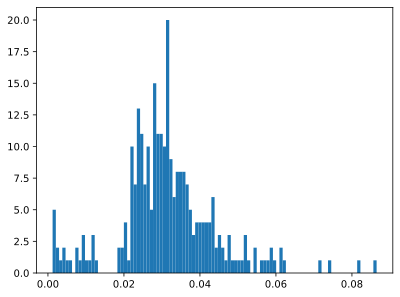

In [ ]:
plt.hist(berkeley_regression_avg_df[berkeley_regression_avg_df['eig_centrality'] < 0.15]['eig_centrality'].values.tolist(), bins= 100)

(array([21., 11., 12., 10., 17., 10., 20., 13., 15., 14., 12.,  8.,  8.,
        11.,  6.,  9.,  6.,  9.,  4.,  5.,  7.,  4.,  2.,  2.,  1.,  2.,
         3.,  5.,  0.,  0.,  2.,  0.,  1.,  1.,  3.,  0.,  0.,  0.,  1.,
         0.,  1.,  2.,  0.,  1.,  1.,  0.,  2.,  2.,  0.,  1.,  1.,  0.,
         1.,  0.,  0.,  0.,  0.,  1.,  3.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  1.,  0.,  2.,  0.,  2.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([0.        , 0.00190476, 0.00380952, 0.00571429, 0.00761905,
        0.00952381, 0.01142857, 0.01333333, 0.0152381 , 0.01714286,
        0.01904762, 0.02095238, 0.02285714, 0.0247619 , 0.02666667,
        0.02857143, 0.03047619, 0.03238095, 0.03428571, 0.03619048,
        0.03809524, 0.04      , 0.04190476, 0.04380952, 0.04571429,
        0.04761905, 0.04952381, 0.05142857, 0.05333333, 0.0552381 ,
        0.05714286, 0.0590

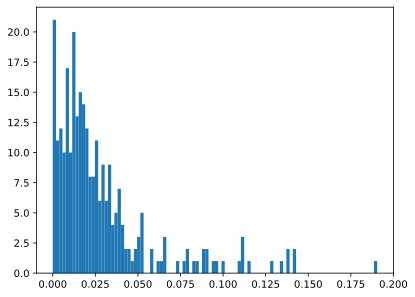

In [ ]:
plt.hist(berkeley_regression_avg_df['clustering_coeff'].values.tolist(), bins= 100)

In [ ]:
def normalize_data(df, column):
  return df[column] - df[column].mean()/df[column].std()

In [ ]:
import seaborn as sns


In [22]:
# fit a univariate regression model
def fit_regression_line(y, X, regressor):
  model = sm.OLS(y, X)
  results = model.fit()

  param = results.params
  fitted = np.transpose(X) * param

  fig, ax = plt.subplots(figsize=(8,4))
  plt.plot(X, y, 'o')
  plt.plot(X, fitted ,'-', label='coefficient: ' + str(round(param[0], 2)))
  ax.set_xlabel(regressor)
  ax.set_ylabel('post_pos_sentiment')
  plt.legend()
  plt.show()

In [23]:
def fit_regression_line_intercept(y, X, regressor):
    X = sm.add_constant(X)  # adding a constant term for intercept
    model = sm.OLS(y, X)
    results = model.fit()

    param = results.params
    fitted = np.dot(X, param)

    fig, ax = plt.subplots(figsize=(8,4))
    plt.plot(X[:, 1], y, 'o')  # X[:, 1] since X[:, 0] is the constant term
    plt.plot(X[:, 1], fitted ,'-', label='intercept: ' + str(round(param[0], 2)) +
                                        ', coefficient: ' + str(round(param[1], 2)))
    ax.set_xlabel(regressor)
    ax.set_ylabel('post_pos_sentiment')
    plt.legend()
    plt.show()



---



### eig_centrality vs agg_pos_comment_sentiment 
Model : 
$y_{agg-pos-comment-sentiment} = \beta_0 + \beta_1 \cdot X_{eig-centrality}  + \beta_2 \cdot X_{num-comments} + \epsilon $
Here, we control for the post positive sentiment to make sure that the comment sentiment is not being driven by the fact that the user posted something positive which is leading other users to comment a certain way. We also control for the number of comments, since the change aggregated comment sentiment may be driven by the number of comments the post has. 

(array([ 61.,  37.,  12.,   5.,  66., 112.,  42.,  22.,  19.,  17.,   2.,
          5.,   9.,   0.,   0.,  10.,   8.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,  25.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         42.]),
 array([3.47854006e-05, 6.23878746e-03, 1.24427895e-02, 1.86467916e-02,
        2.48507937e-02, 3.10547957e-02, 3.72587978e-02, 4.34627998e-02,
        4.96668019e-02, 5.58708040e-02, 6.20748060e-02, 6.82788081e-02,
        7.44828101e-02, 8.06868122e-02, 8.68908143e-02, 9.30948163e-02,
        9.92988184e-02, 1.0550

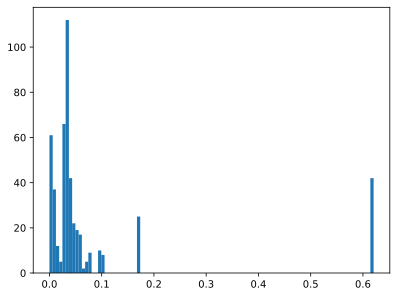

In [ ]:
plt.hist(berkeley_regression_df['eig_centrality'].values, bins= 100)

In [38]:
# for all values of eig_centrality
X = berkeley_regression_avg_df[['eig_centrality', 'num_comments']].values
y = berkeley_regression_avg_df['agg_comment_pos'].values
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     57.61
Date:                Sun, 04 Jun 2023   Prob (F-statistic):           1.24e-21
Time:                        20:40:49   Log-Likelihood:                -943.09
No. Observations:                 279   AIC:                             1892.
Df Residuals:                     276   BIC:                             1903.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.9575      0.598      9.964      0.0

In [52]:
# for all values of eig_centrality
berkeley_regression_avg_df['ln_eig_centrality'] = np.log(berkeley_regression_avg_df['eig_centrality'])
X = berkeley_regression_avg_df[['ln_eig_centrality', 'num_comments', 'upvote_ratio']].values
y = berkeley_regression_avg_df['agg_comment_compound'].values
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     36.89
Date:                Sun, 04 Jun 2023   Prob (F-statistic):           4.55e-20
Time:                        21:01:27   Log-Likelihood:                -1136.4
No. Observations:                 279   AIC:                             2281.
Df Residuals:                     275   BIC:                             2295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -107.6704     17.323     -6.216      0.0

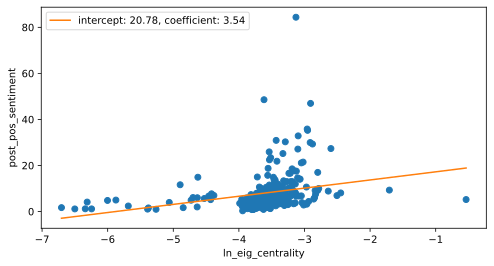

In [45]:
fit_regression_line_intercept(berkeley_regression_avg_df['agg_comment_pos'].values, 
                              berkeley_regression_avg_df['ln_eig_centrality'].values, 'ln_eig_centrality')